In [29]:
import torch
import pandas as pd
import librosa
import numpy as np
import os
import soundfile as sf
import matplotlib.pyplot as plt

In [30]:
meta_df = pd.read_csv("/kaggle/input/musiccaps/musiccaps-public.csv")
wav_path = "/kaggle/input/musiccap-musicfiles/music_data"

In [31]:
meta_df

,ytid,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval
0,-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,4,False,True
1,-0SdAVK79lg,30,40,"/m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...","['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,False,False
2,-0vPFx-wRRI,30,40,"/m/025_jnm,/m/04rlf","['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,6,False,True
3,-0xzrMun0Rs,30,40,"/m/01g90h,/m/04rlf","['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,6,False,True
4,-1LrH01Ei1w,30,40,"/m/02p0sh1,/m/04rlf","['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,False,False
...,...,...,...,...,...,...,...,...,...
5516,zw5dkiklbhE,15,25,"/m/01sm1g,/m/0l14md","['amateur recording', 'percussion', 'wooden bo...",This audio contains someone playing a wooden b...,6,False,False
5517,zwfo7wnXdjs,30,40,"/m/02p0sh1,/m/04rlf,/m/06j64v","['instrumental music', 'arabic music', 'genera...",The song is an instrumental. The song is mediu...,1,True,True
5518,zx_vcwOsDO4,50,60,"/m/01glhc,/m/02sgy,/m/0342h,/m/03lty,/m/04rlf,...","['instrumental', 'no voice', 'electric guitar'...",The rock music is purely instrumental and feat...,2,True,True
5519,zyXa2tdBTGc,30,40,"/m/04rlf,/t/dd00034","['instrumental music', 'gospel music', 'strong...",The song is an instrumental. The song is slow ...,1,False,False


In [32]:
def load_audio(file_path, sr=22050):
    """
    Load an audio file and return the audio time series and sampling rate.
    """
    try:
        y, sr = librosa.load(file_path, sr=sr)
        return y, sr
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None
    except Exception as e:
        print(f"Error loading audio file {file_path}: {str(e)}")
        return None, None

def extract_features(y, sr, n_mels=128):
    """
    Extract Mel-spectrogram features from an audio time series.
    """
    if y is None or sr is None:
        return None
    try:
        # Extract Mel-spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        # Convert to log scale (dB)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        return log_mel_spectrogram
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return None

def extract_features_for_row(row, audio_dir):
    """
    Extract features for an audio file specified in the DataFrame row.
    Append the .wav extension to the file name.
    """
    file_path = os.path.join(audio_dir, row['ytid'] + '.wav')
    y, sr = load_audio(file_path)
    features = extract_features(y, sr)
    return features

In [33]:
meta_df['audio_features'] = meta_df.apply(lambda row: extract_features_for_row(row, wav_path), axis=1)

# Remove rows where audio features could not be extracted
meta_df = meta_df.dropna(subset=['audio_features'])

/tmp/ipykernel_33/1780396260.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /kaggle/input/musiccap-musicfiles/music_data/-sevczF5etI.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/0J_2K1Gvruk.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/0fqtA_ZBn_8.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/0khKvVDyYV4.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/0pewITE1550.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/25Ccp8usBtE.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/2dyxjGTXSpA.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/374R7te0ra0.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/5Y_mT93tkvQ.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/63rqIYPHvlc.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/7B1OAtD_VIA.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/7LGLhQFiE0s.wav
File not found: /kaggle/input/musiccap-musicfiles/music_data/7WZwlOrRELI.wav

In [34]:
meta_df['audio_features'].iloc[0]

array([[-42.263252, -40.999256, -40.65101 , ..., -35.77577 , -32.77741 ,
        -35.316624],
       [-39.487373, -43.356247, -40.246853, ..., -40.219406, -40.052063,
        -40.595444],
       [-33.36653 , -34.660812, -35.668575, ..., -53.280045, -49.1272  ,
        -46.888348],
       ...,
       [-71.4451  , -67.79354 , -67.42163 , ..., -60.157993, -62.520924,
        -66.75891 ],
       [-72.59428 , -69.48265 , -69.51026 , ..., -62.54373 , -66.42211 ,
        -70.44121 ],
       [-80.      , -80.      , -80.      , ..., -73.02263 , -78.97306 ,
        -77.41766 ]], dtype=float32)

In [35]:
meta_df.to_pickle('audio_dataset_128.pkl')

In [36]:
def plot_mel_spectrogram(mel_spectrogram, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.show()

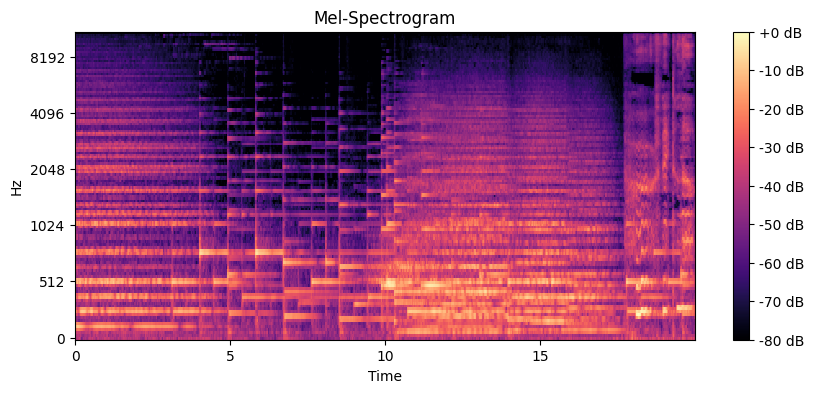

In [37]:
plot_mel_spectrogram(meta_df['audio_features'].iloc[0], 22050)

In [38]:
def mel_spectrogram_to_audio(mel_spectrogram, sr, n_iter=128, n_fft=2048, hop_length=512, win_length=None):
    """
    Convert a Mel-spectrogram back to an audio signal.
    """
    if win_length is None:
        win_length = n_fft
    
    # Convert back to linear scale from dB
    mel_spectrogram = librosa.db_to_power(mel_spectrogram)
    
    # Create a Mel filter bank
    mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=mel_spectrogram.shape[0])
    
    # Invert the Mel filter bank
    inv_mel_basis = np.linalg.pinv(mel_basis)
    
    # Reconstruct the spectrogram
    S = np.dot(inv_mel_basis, mel_spectrogram)
    
    # Apply Griffin-Lim algorithm to recover the phase
    audio = librosa.griffinlim(S, n_iter=n_iter, hop_length=hop_length, win_length=win_length)
    
    return audio

In [39]:
audio = mel_spectrogram_to_audio(meta_df['audio_features'].iloc[0], 22050)

In [40]:
sf.write("aduio_niter_256b_64i.wav", audio, 22050)

print(f"Reconstructed audio saved")

Reconstructed audio saved
